<a href="https://colab.research.google.com/github/Itiel-z/Intro-to-AI-colab/blob/main/Assignment%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 7 - Itiel

# Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- Data Collection and Loading ---

In [4]:
# Load the 'Boston Housing' dataset and convert it into a pandas DataFrame.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
df = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
df["MEDV"] = target

# --- Quick Check of Data ---

In [5]:
# Display the first few rows of the dataset to understand its structure.
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Check the features and target variable. Identify which is continuous and categorical if applicable
print(f'Below if the basic information about the structure of the dataset:\n')
df.info()
print(f'Below is the summary statistics of the dataset:\n')
df.describe()

Below if the basic information about the structure of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
Below is the summary statistics of the dataset:



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


All the available features are contiuous numeric and the target variable which in this case is the *MEDV* is also a continuous numerical value

# --- EDA and Data Preprocessing ---

In [7]:
# Check for missing/null values.
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


<Axes: xlabel='CRIM', ylabel='MEDV'>

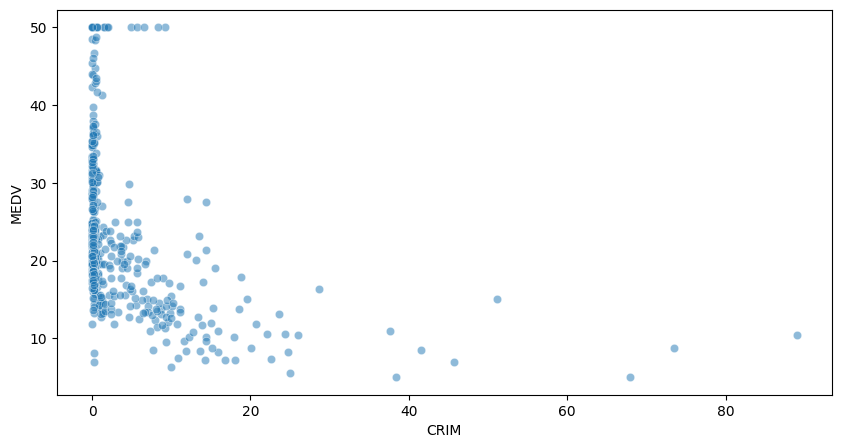

In [8]:
# scatter plot between medv and crim
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'CRIM', y = 'MEDV', alpha = 0.5)

<Axes: xlabel='ZN', ylabel='MEDV'>

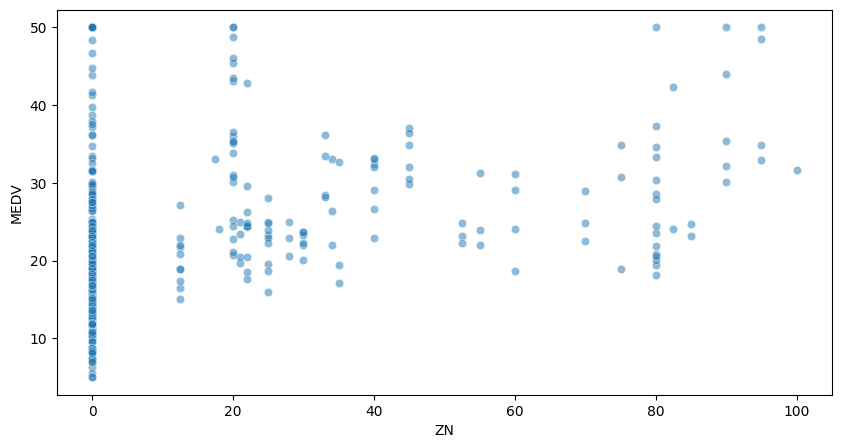

In [9]:
# Scatter plot between medv and zn
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'ZN', y = 'MEDV', alpha = 0.5)

<Axes: xlabel='INDUS', ylabel='MEDV'>

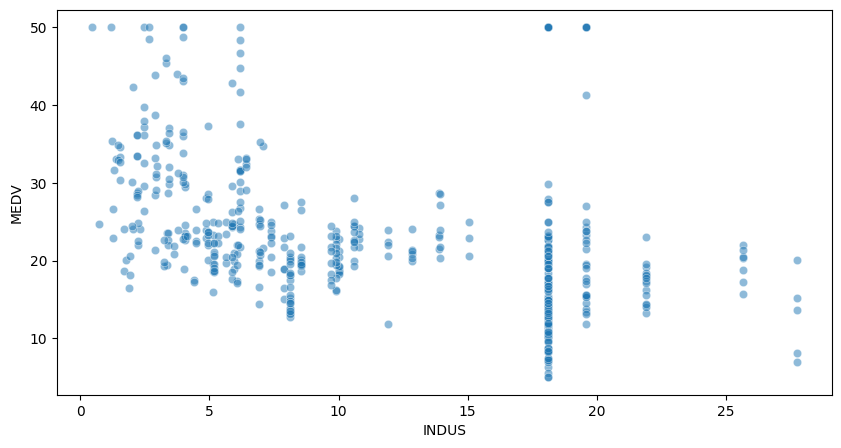

In [10]:
# Scatter plot between medv and indus
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'INDUS', y = 'MEDV', alpha = 0.5)

<Axes: xlabel='CHAS', ylabel='MEDV'>

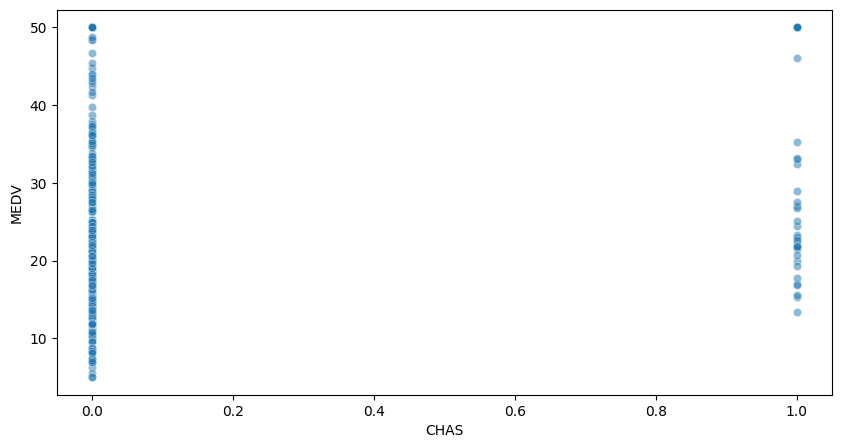

In [11]:
# Scatter plot between medv and chas
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'CHAS', y = 'MEDV', alpha = 0.5)

<Axes: xlabel='NOX', ylabel='MEDV'>

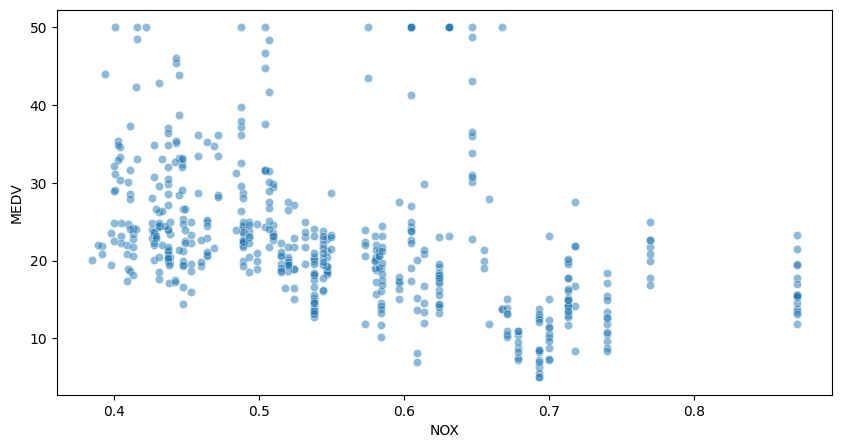

In [12]:
# scatter plot between medv and nox
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'NOX', y = 'MEDV', alpha = 0.5)

<Axes: xlabel='RM', ylabel='MEDV'>

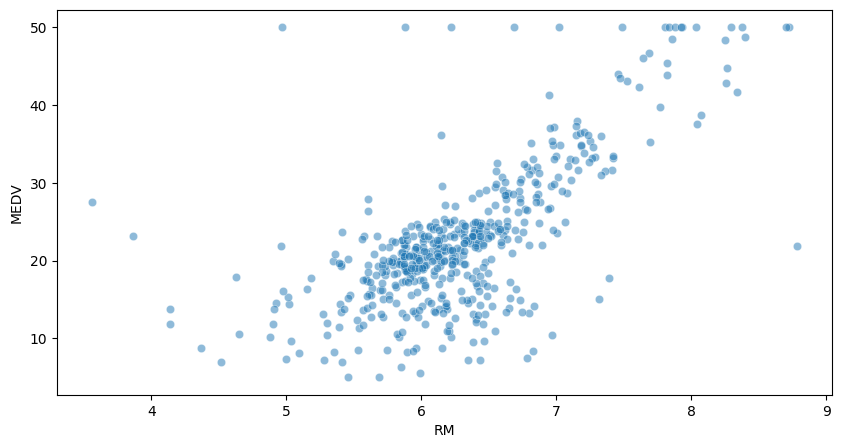

In [13]:
# Scatter plot between medv and rm
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'RM', y = 'MEDV', alpha = 0.5)

<Axes: xlabel='AGE', ylabel='MEDV'>

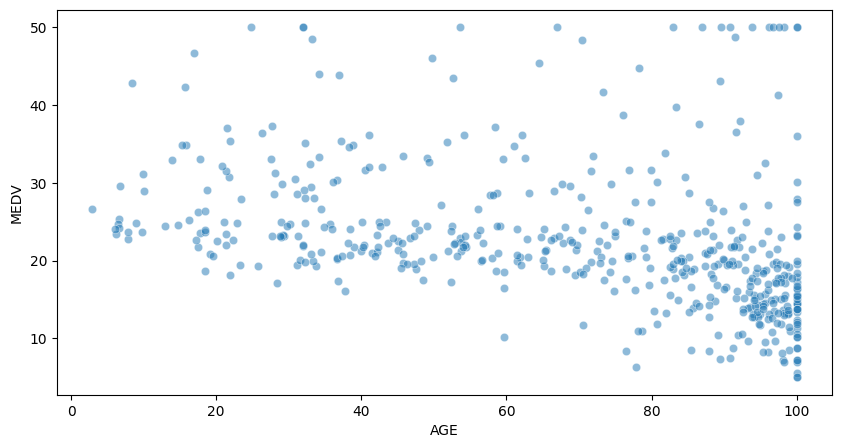

In [14]:
# Scatter plot between medv and age
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'AGE', y = 'MEDV', alpha = 0.5)

<Axes: xlabel='DIS', ylabel='MEDV'>

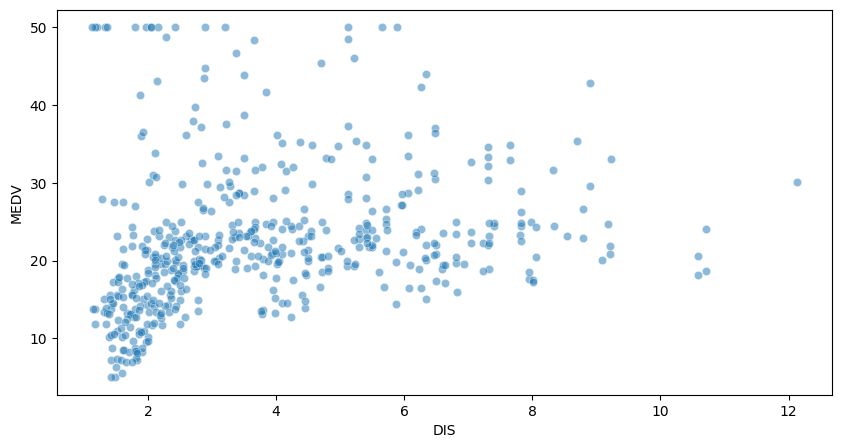

In [15]:
# scatter plot between medv and dis
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'DIS', y = 'MEDV', alpha = 0.5)

<Axes: xlabel='RAD', ylabel='MEDV'>

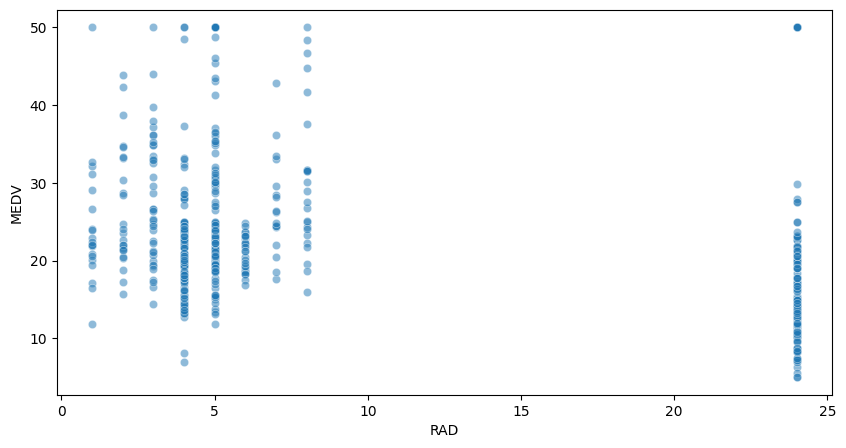

In [16]:
# Scatter plot between medv and rad
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'RAD', y = 'MEDV', alpha = 0.5)

<Axes: xlabel='TAX', ylabel='MEDV'>

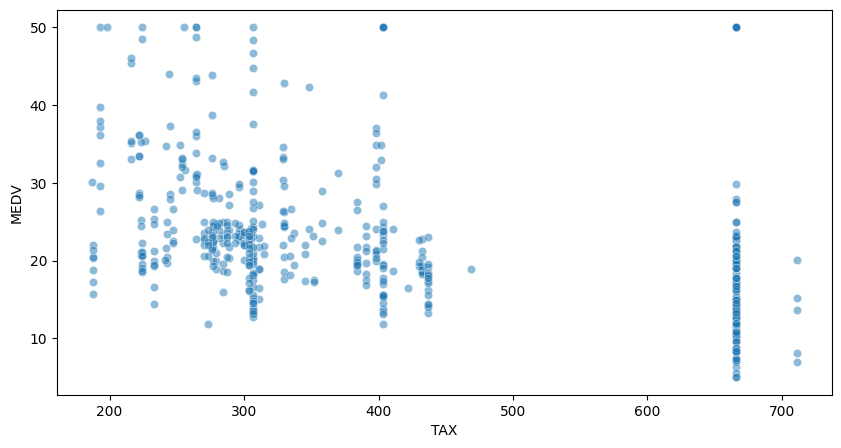

In [17]:
# Scatter plot between medv and tax
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'TAX', y = 'MEDV', alpha = 0.5)

<Axes: xlabel='PTRATIO', ylabel='MEDV'>

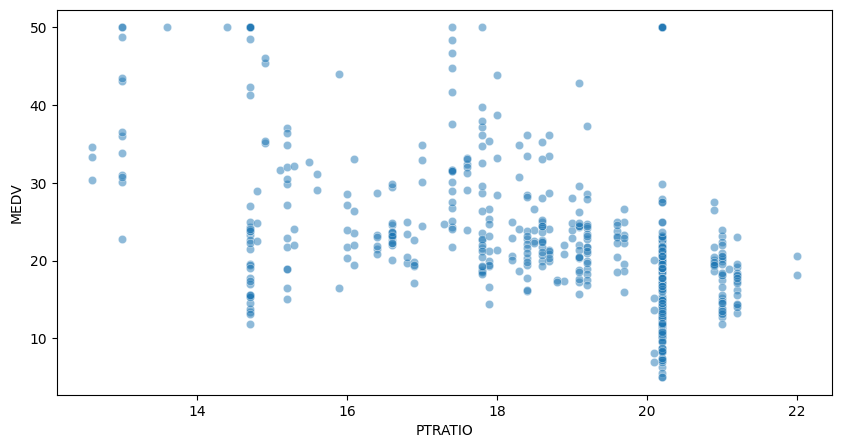

In [18]:
# Scatter plot between medv and ptratio
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'PTRATIO', y = 'MEDV', alpha = 0.5)

<Axes: xlabel='B', ylabel='MEDV'>

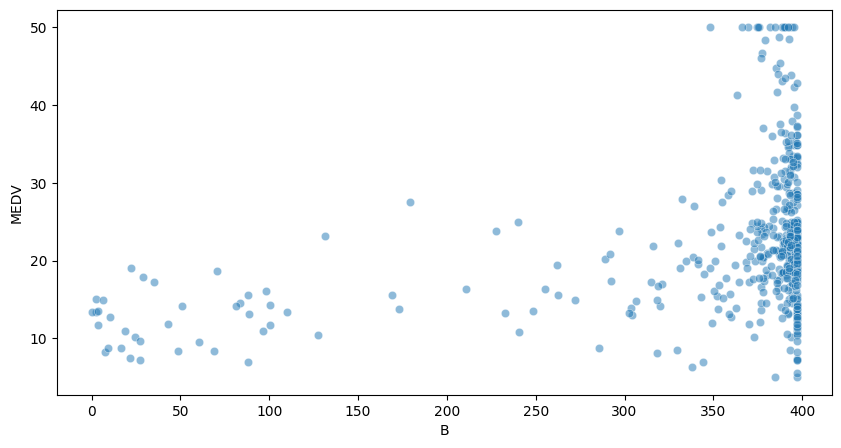

In [19]:
# Scatter plot between medv and b
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'B', y = 'MEDV', alpha = 0.5)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

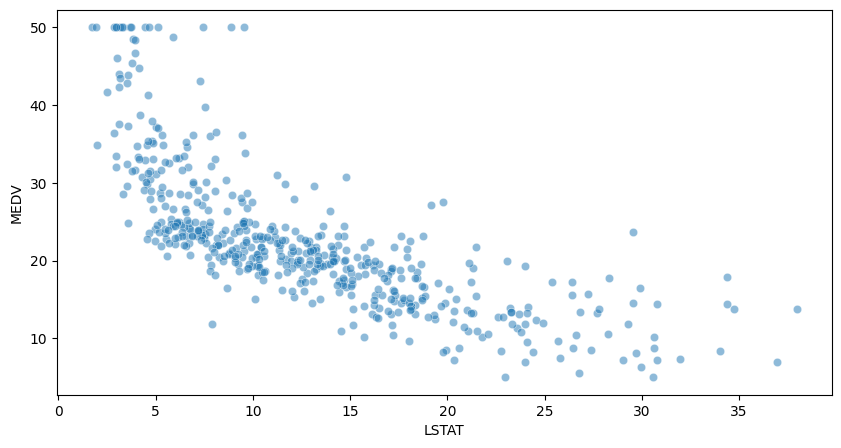

In [20]:
# Scatter plot between medv and lstat
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'LSTAT', y = 'MEDV', alpha = 0.5)

# Automating scatter plot creation

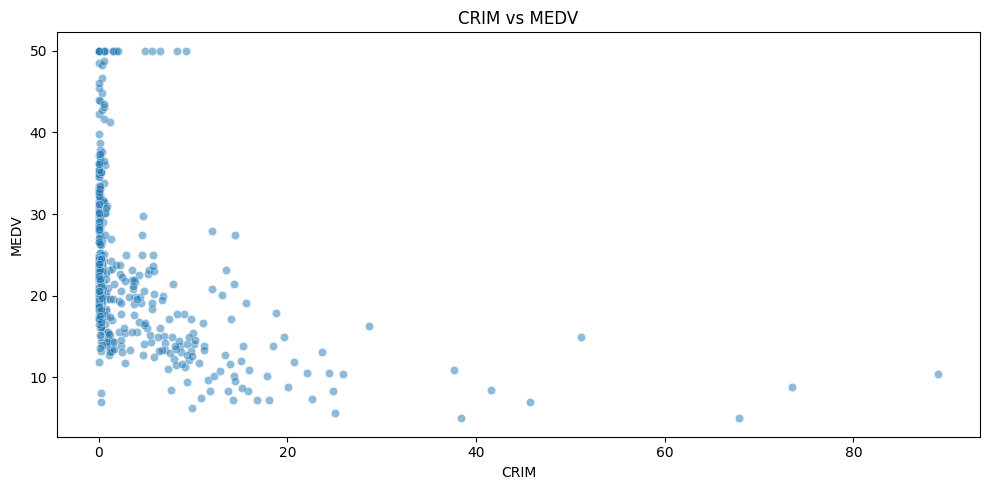

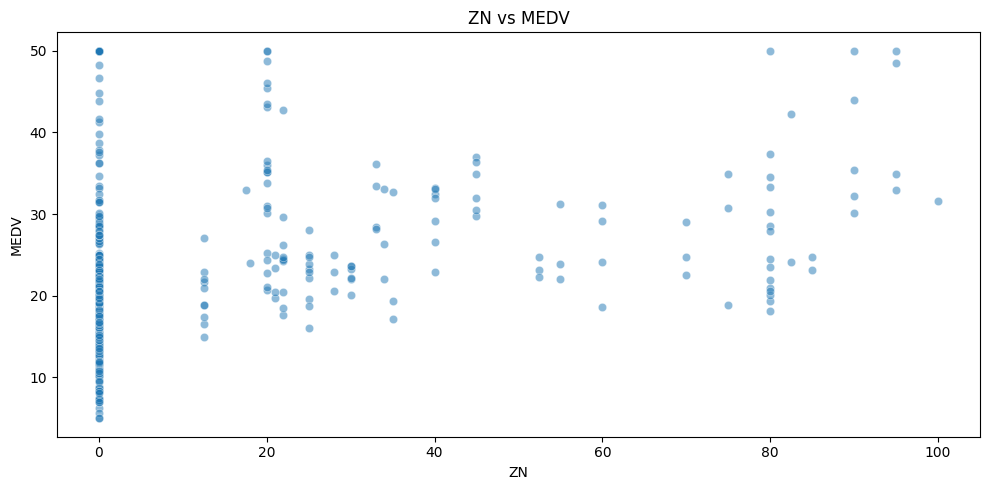

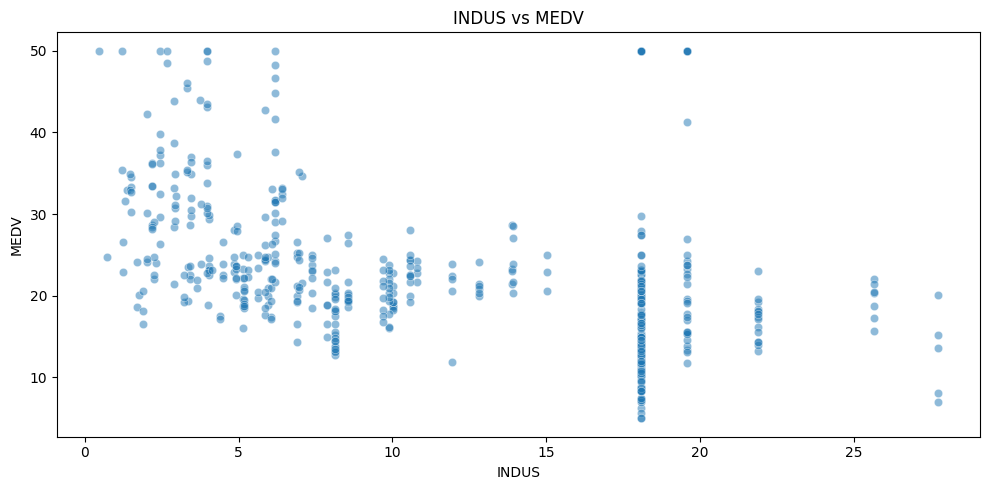

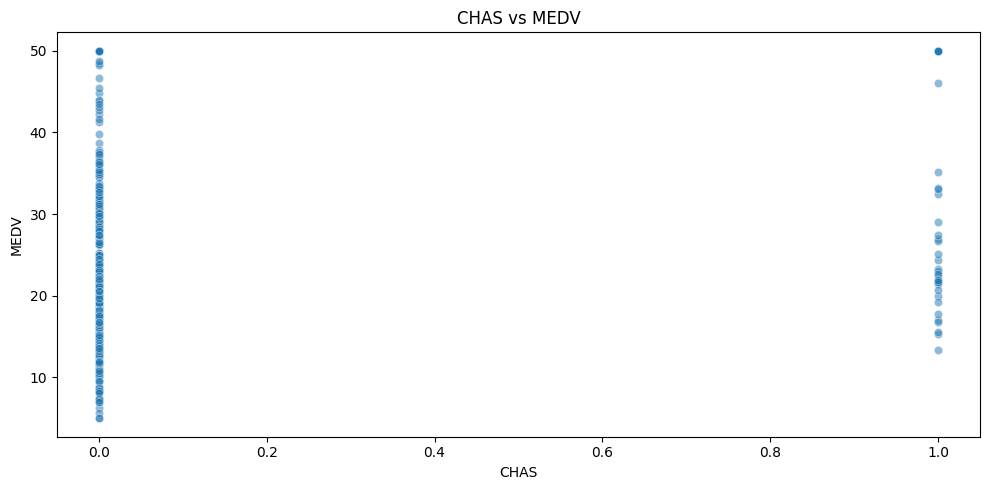

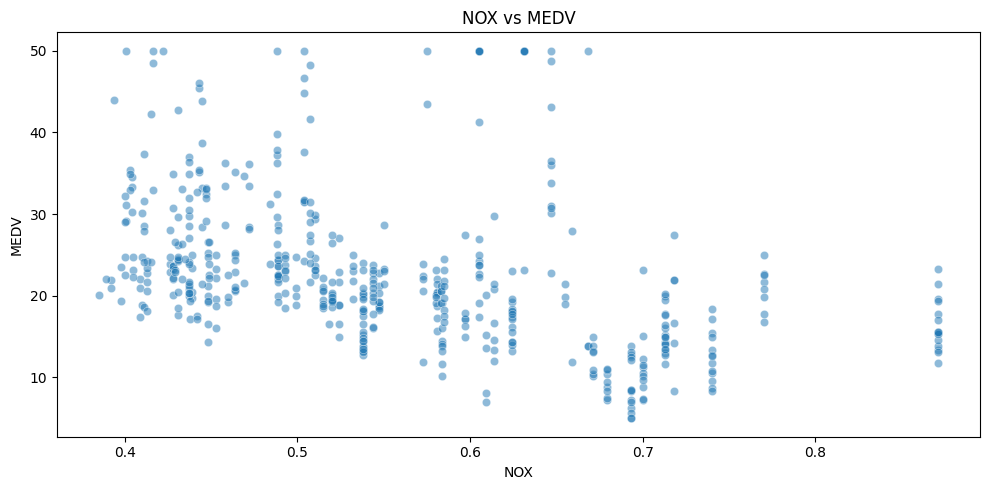

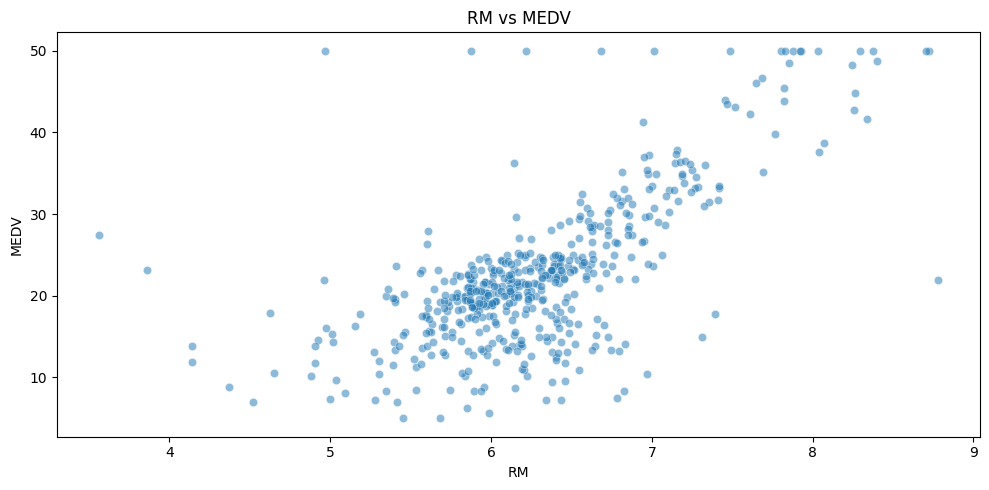

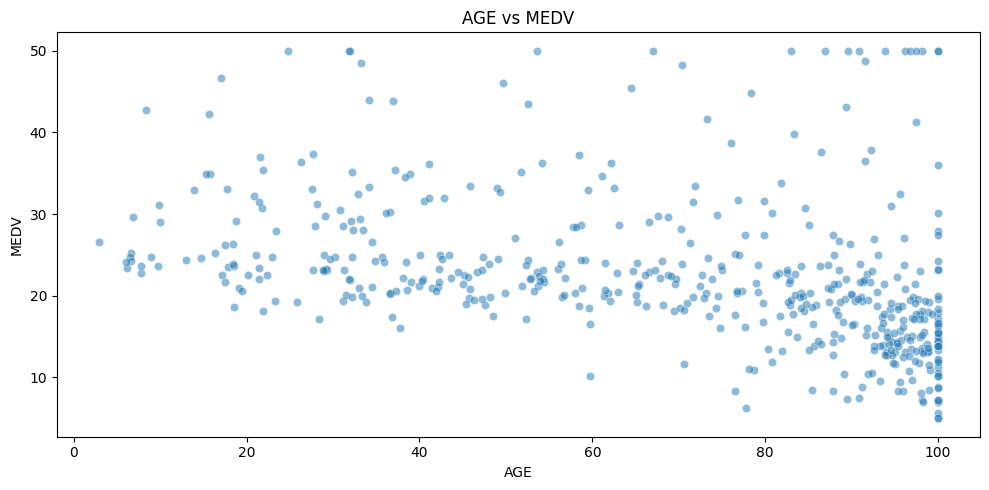

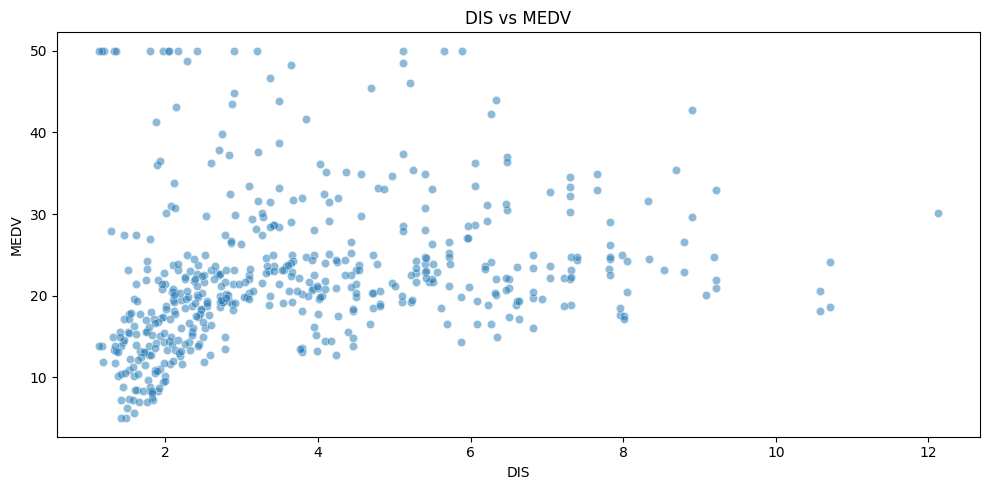

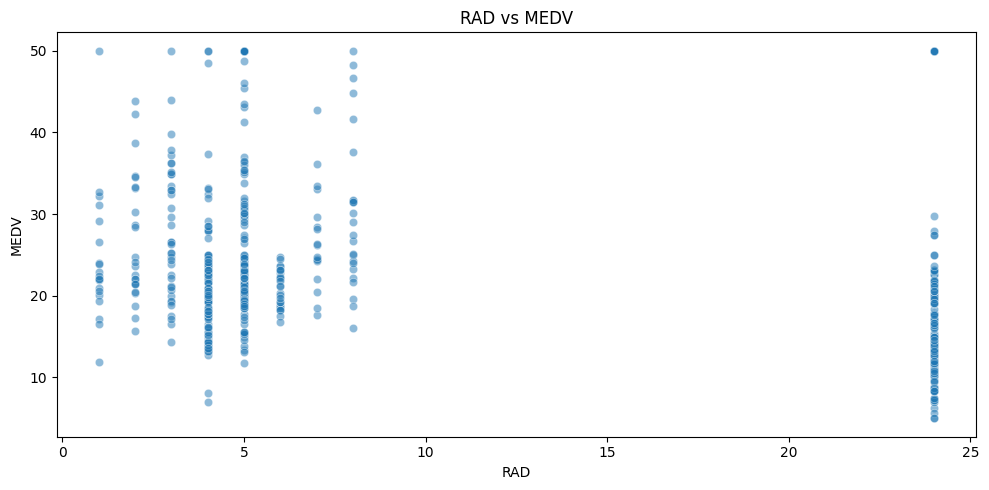

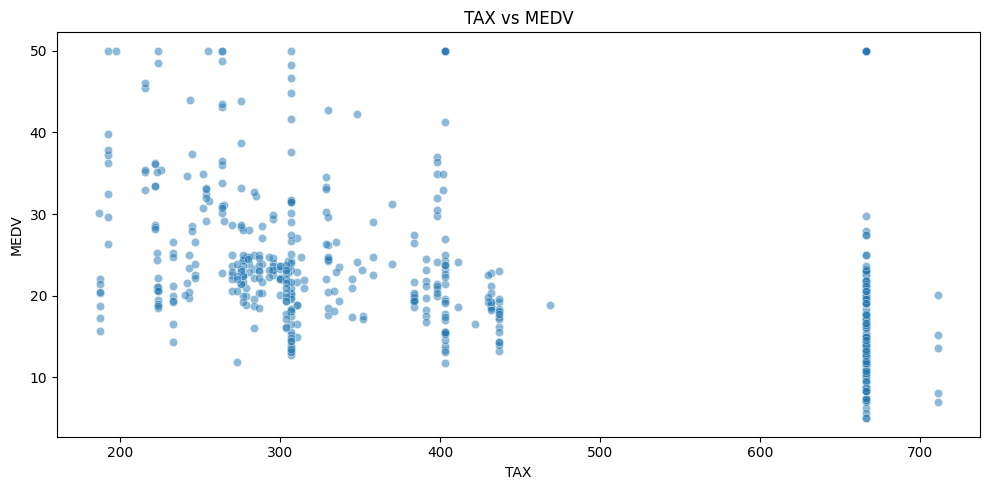

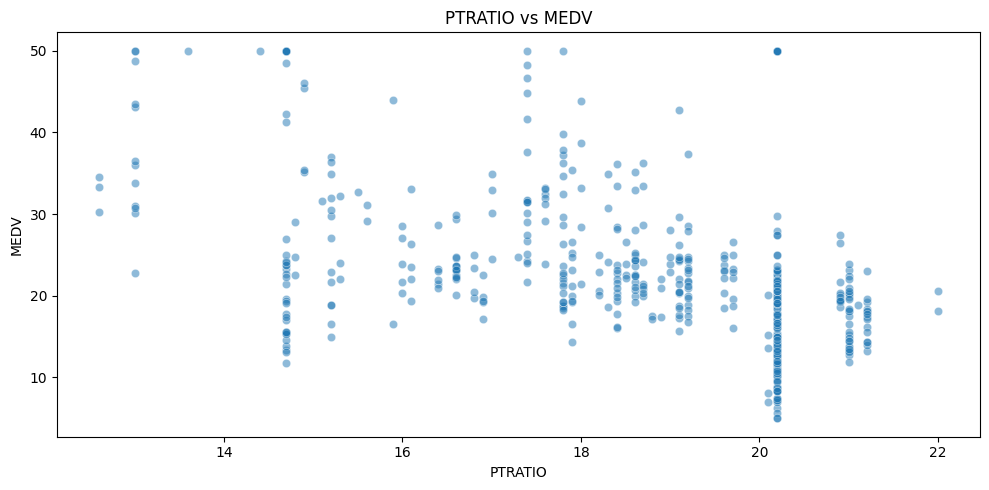

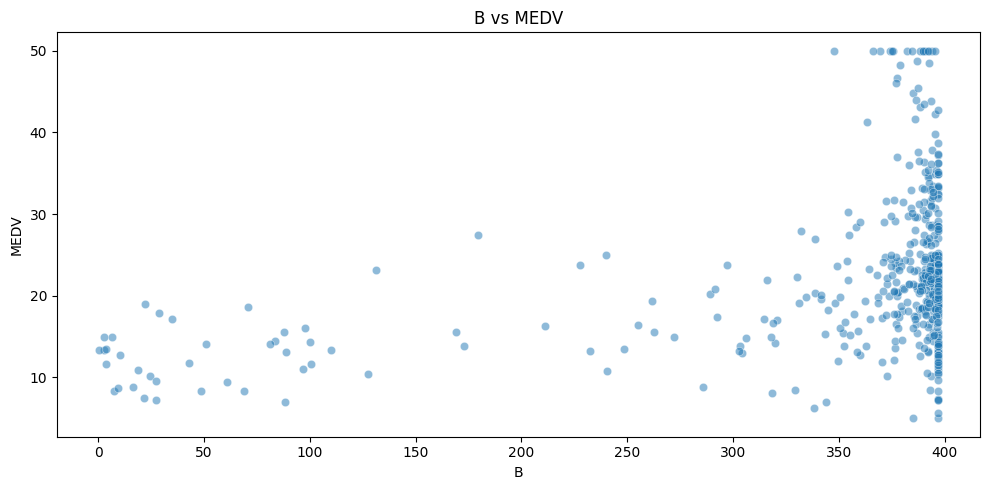

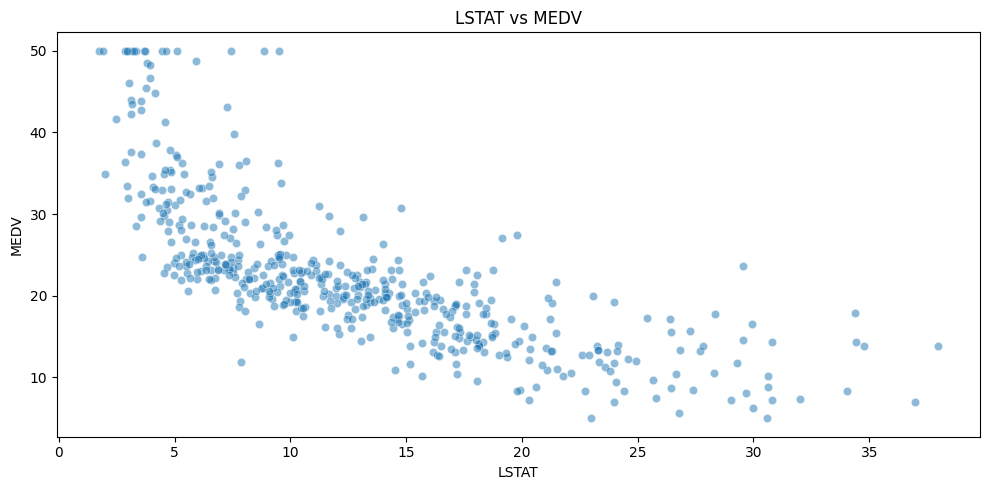

In [21]:
# Visualize the data. Create scatter plots to see the relationship between independent features and the target variable (MedHouseVal).
# create variables for easy of use
features  = df.drop(columns=['MEDV'])
target = df['MEDV']
for feature in features.columns:
    plt.figure(figsize = (10, 5))
    sns.scatterplot(data = df, x = feature, y = target, alpha = 0.5)
    plt.title(f'{feature} vs MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.tight_layout()
    plt.show()

# --- ML Model Training ---

In [22]:
# set variables
X = features
y = target

#  Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [23]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 22.7818
R-squared: 0.6893


# --- Model Prediction ---

In [27]:
# Predict house prices from a new set of feature inputs.
new_house = pd.DataFrame({
    'CRIM': [0.048],
    'ZN': [19],
    'INDUS': [3.11],
    'CHAS': [0.05],
    'NOX': [0.5],
    'RM': [6.3345],
    'AGE': [6.575],
    'DIS': [4.333],
    'RAD': [3],
    'TAX': [288.3],
    'PTRATIO': [16.8],
    'B': [390.11],
    'LSTAT': [6.86]})

predicted_price = model.predict(new_house)
print(f'Predicted Price: ${predicted_price[0]*100000:,.2f}')

Predicted Price: $2,220,000.00


In [28]:
# Predict another house prices from a new set of feature inputs. (CRIM,	ZN,	INDUS,	CHAS,	NOX,	RM,	AGE,	DIS,	RAD,	TAX,	PTRATIO,	B,	LSTAT)
her_house = np.array([[0.009, 13.3, 6.2, 0.0, 0.322, 6.111, 55.8, 3.5, 3, 250.2, 16.3, 301.6, 12.5]])

predicted_price = model.predict(her_house)
print(f'Predicted Price: ${predicted_price[0]*100000:,.2f}')

Predicted Price: $2,140,000.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


The end